Step 1/2:

Downloaded the dataset and loaded everything(it was already split to 70/30)

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import confusion_matrix as CM
classifier = Sequential()

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [3]:
training_set = train_datagen.flow_from_directory('C:/Users/Talal/Desktop/Python/CNN Subfolder/Fruits Identification/fruits-360/Training',
                                                 target_size = (100, 100),
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 4306 images belonging to 9 classes.


In [4]:
test_set = test_datagen.flow_from_directory('C:/Users/Talal/Desktop/Python/CNN Subfolder/Fruits Identification/fruits-360/Test',
                                            target_size = (100, 100),
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 1445 images belonging to 9 classes.


Step 3/4:

Defined the Network and used livelossplot to show results

In [5]:
# Convolution Layer
classifier.add(Conv2D(16, (2, 2), input_shape = (100, 100, 3), activation = 'relu'))

# Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution Layer
classifier.add(Conv2D(32, (2, 2), activation = 'relu'))

# Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution Layer
classifier.add(Conv2D(64, (2, 2), activation = 'relu'))

# Convolution Layer
classifier.add(Conv2D(64, (2, 2), activation = 'relu'))

# Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add a dropout layer
classifier.add(Dropout(0.3))

# Flattening layer
classifier.add(Flatten())

# Fully connected dense layer
classifier.add(Dense(units = 150, activation = 'relu'))

# Add a dropout layer
classifier.add(Dropout(0.4))

# Output layer (one node for binary models, use softmax for multi-class models)
classifier.add(Dense(units = 9, activation = 'softmax'))

In [6]:
# Compiling the CNN
# use sparse_categorical_crossentropy for multi-class models
classifier.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

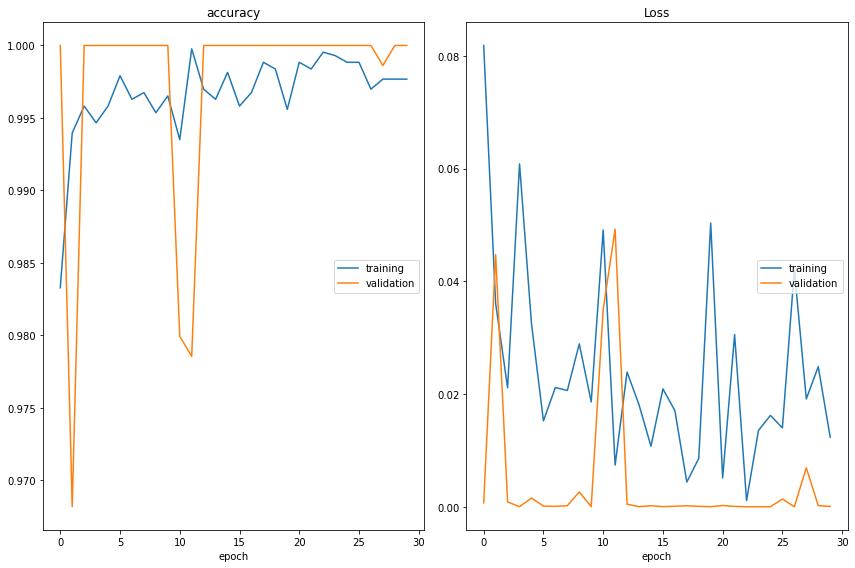

accuracy
	training         	 (min:    0.983, max:    1.000, cur:    0.998)
	validation       	 (min:    0.968, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.001, max:    0.082, cur:    0.012)
	validation       	 (min:    0.000, max:    0.049, cur:    0.000)


In [35]:
from livelossplot import PlotLossesKeras

classifier.fit(training_set,
               epochs = 30,
               validation_data = test_set,
               callbacks=[PlotLossesKeras()],
               batch_size=32,
               verbose=0)

Step 5:

Accuracy is shown above and the Confusion Matrix is shown below

In [8]:
y_pred = classifier.predict(test_set)

46/46 [==============================] - 1s 18ms/step


In [22]:
test_labels = test_set.labels

In [23]:
actuals = test_set.labels

In [31]:
import numpy as np

predict_labels = np.argmax(y_pred, axis =-1)

In [33]:

print('Confusion Matrix: \n', CM(test_labels,predict_labels))

Confusion Matrix: 
 [[160   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0]
 [  0   0 166   0   0   0   0   0   0]
 [  0   0   0 164   0   0   0   0   0]
 [  0   0   0   0 166   0   0   0   0]
 [  0   0   0   0   0 156   0   0   0]
 [  0   0   0   0   0   0 164   0   0]
 [  0   0   0   0   0   0   0 166   0]
 [  0   0   0   0   0   0   0   0 160]]
